# Flooding module

Niche Vlaanderen also contains a module to model the influence of flooding more precisely. This is done using the [Flooding](lowlevel.rst#flooding) class. 

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`.

In [1]:
from pathlib import Path
import niche_vlaanderen as nv

%matplotlib inline
import matplotlib.pyplot as plt

## Creating  a Flooding model
Here the [Flooding](lowlevel.rst#flooding) class is created. Like in Niche Vlaanderen, when creating the class, the model with its codetables is initialized.

In [2]:
fp = nv.Flooding()

## Running the model

The [calculate](lowlevel.rst#niche_vlaanderen.Flooding.calculate) method of the class takes four arguments: the depths (as grid), frequency, period and duration.

In [3]:
fp.calculate(depth_file="../testcase/flooding/ff_bt_t10_h_0.asc",
             frequency="T10", period="summer", duration=1)

## Inspecting the model
The results can be plotted per vegetation type. Note that [not all vegetation types of Niche are supported](overstroming.rst#Vegetatietypen) by the flooding module.

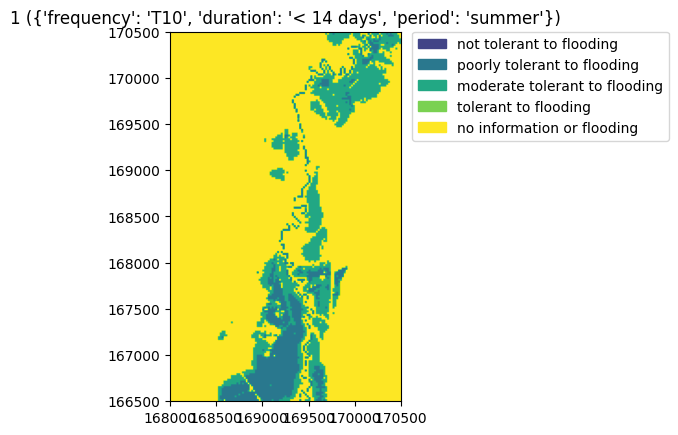

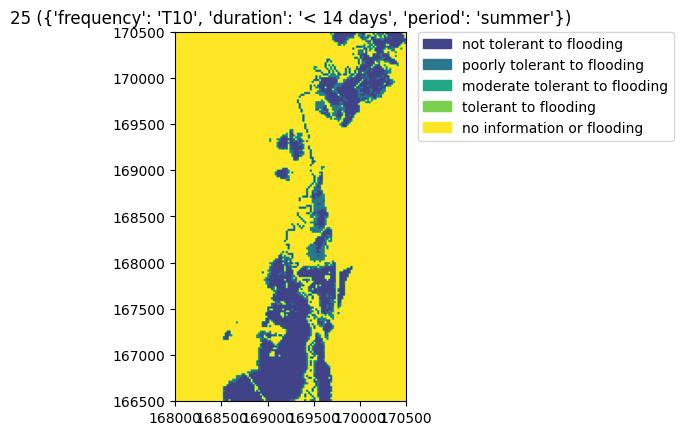

In [4]:
fp.plot(1)
fp.plot(25)

plt.show()

Like for the niche model, it is also possible to generate a summary table.

In [5]:
fp.table.head()

,vegetation,presence_code,presence,area_ha
0,1,4,no information or flooding,821.36
1,1,2,moderate tolerant to flooding,110.92
2,1,1,poorly tolerant to flooding,67.72
3,2,4,no information or flooding,821.36
4,2,2,moderate tolerant to flooding,110.92


## Saving the model
Comparable to the niche model, the resulting grids can be saved using the [write](lowlevel.rst#niche_vlaanderen.Flooding.write) method.

In [6]:
fp.write("_output", overwrite_files=True)

## Combining the output with niche

The output of a Flooding model can be combined with a Niche model, by using the [combine](lowlevel.rst#niche_vlaanderen.Flooding.combine) method. 

We will create a new niche model and set the inputs.

In [7]:
myniche = nv.Niche()
input_folder = Path("../testcase/dijle/")
myniche.set_input("soil_code", input_folder / "bodemv.asc")
myniche.set_input("msw", input_folder / "gvg_0_cm.asc")
myniche.set_input("mlw", input_folder / "glg_0_cm.asc")
myniche.set_input("mhw", input_folder / "ghg_0_cm.asc")
myniche.set_input("seepage", input_folder / "kwel_mm_dag.asc")
myniche.set_input("management", input_folder / "beheer_int.asc")
 
myniche.set_input("nitrogen_atmospheric", input_folder / "depositie_def.asc")
myniche.set_input("nitrogen_animal", input_folder / "bemest_dier.asc")
myniche.set_input("nitrogen_fertilizer", input_folder / "bemest_kunst.asc")

myniche.set_input("inundation_vegetation", input_folder / "overstr_veg.asc")
myniche.set_input("inundation_acidity", input_folder / "ovrstr_t10_50.asc")
myniche.set_input("inundation_nutrient", input_folder / "ovrstr_t10_50.asc")
 
myniche.set_input("minerality", input_folder / "minerality.asc") 
myniche.set_input("rainwater", input_folder / "nulgrid.asc")

Note that the niche model must be run prior to combining - otherwise this will raise an error.

In this example we also plot the result to allow comparison with the combined map.

In [8]:
myniche.run()

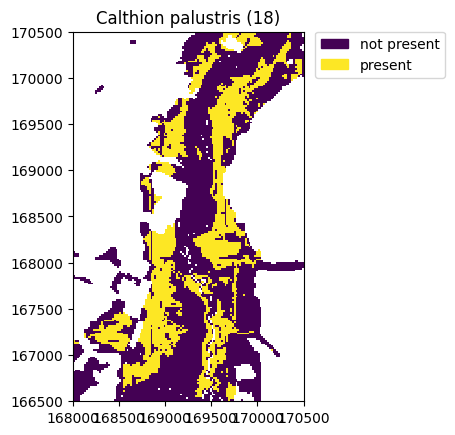

In [9]:
myniche.plot(18)
plt.show()

Finally, we run the actual [combine](lowlevel.rst#niche_vlaanderen.Flooding.combine) method. The resulting object is a Flooding object, so we can use the same method for plotting the results.

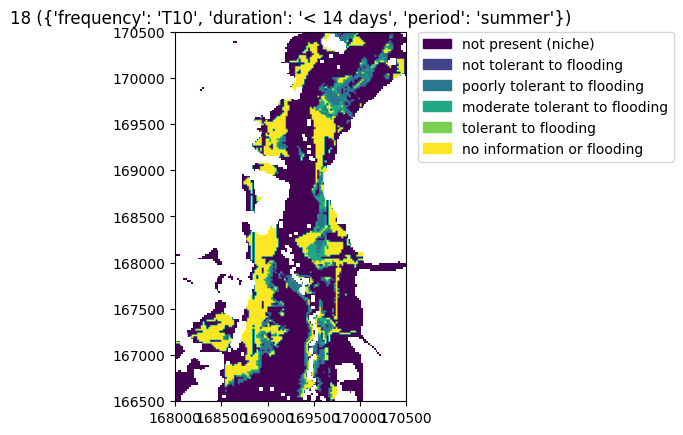

In [10]:
combined = fp.combine(myniche)
combined.plot(18)
plt.show()